# Exploring AirBnB in Athens

A lot has been said and written about the effect of AirBnB in Athens. In this assignment, you will use the data collected by [Inside AirBnB](http://insideairbnb.com), so you can go ahead and download the Athens data from http://insideairbnb.com/get-the-data.html.

Once you do that, spend some time familiarizing yourself with the data and then go ahead and do the following tasks.

---

> Dionysios Rigatos <br />
> Department of Informatics  <br />
> Athens University of Economics and Business <br />
> p3200262@aueb.gr

## Prologue & Exploratory Data Analysis

* The dataset folders are considered to be in a folder named `airbnb`, within the same root directory as `airbnb.ipynb`.

* The `HTML` file produced, named `athens_airbnb_map.html` is exported in the root directory.

### Imports

We will be using libraries as shown in the lecture notebooks to ensure compatability.

* `black` was used for automatic formatting, as it is industry standard.

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import folium

### Listings Data

First and foremost, we will be importing our `listings` dataset. 

Specifically, we will be using the summarized version instead of the one with all the data, as it contains all the relevant information per listing cleaned and will suffice for our analysis and visualizations.

In [151]:
listings_df = pd.read_csv(
    "airbnb/listings.csv", delimiter=",", index_col=False, parse_dates=["last_review"]
)

listings_df.shape

(12955, 18)

* We notice that we have `12.955` observations and `18` features in our data. 


Let's take a deeper look at our data using `info()`.

* We will see the `dtypes` per column.

* How many `null` or `na` values we have per column.

In [152]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12955 entries, 0 to 12954
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              12955 non-null  int64         
 1   name                            12955 non-null  object        
 2   host_id                         12955 non-null  int64         
 3   host_name                       12949 non-null  object        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   12955 non-null  object        
 6   latitude                        12955 non-null  float64       
 7   longitude                       12955 non-null  float64       
 8   room_type                       12955 non-null  object        
 9   price                           12955 non-null  int64         
 10  minimum_nights                  12955 non-null  int64         
 11  nu

* We can see that our columns are generally full and contain all the information that we will need for our analysis. 

* We notice a few missing values in `host_name`, `last_review`, `reviews_per_month` and `license`. We will keep them as is for now, but keep it in mind for later.

* `id` and `host_id` seem to be an `int64`, which could pose a problem when printing listing id's in tables, as they might be shortened in scientific notation if too long.

* The ```neighbourhood_group``` column is null.

* Other than that, the column data types seem to be accurate and no further dtype conversion is necessary. We can treat `object` dtype's as `string`.

There is a couple of adjustments we can do to the data:

* Drop the `neighbourhood_group` column as it is empty.

* Convert the `id` and `host_id` columns to string. 

In [153]:
listings_df.drop("neighbourhood_group", axis=1, inplace=True)

listings_df.shape

(12955, 17)

* Looks like that the column is gone.

* Now, let's convert the `id` and `host_id` columns.

In [154]:
listings_df["id"] = listings_df["id"].astype(str)
listings_df["host_id"] = listings_df["host_id"].astype(str)

listings_df[["id", "host_id"]].dtypes

id         object
host_id    object
dtype: object

It's an `object`, did we do something wrong?

* No, as we previously mentioned, `object`'s may be treated as `str` in Pandas.

Now, let's take a look at a sample of our data so we get a general idea.

In [155]:
listings_df.sample(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
7631,597454711855517718,Rental unit in Athina · ★4.69 · 1 bedroom · 2 ...,748818,George,ΓΚΑΖΙ,37.97602,23.70866,Entire home/apt,72,1,16,2023-09-10,0.91,74,356,5,1447809
1545,20316571,Loft in Athina · ★4.63 · Studio · 1 bed · 1 bath,22227167,Alexandros,ΚΥΨΕΛΗ,37.99979,23.73685,Entire home/apt,71,2,319,2023-09-04,4.32,17,15,45,00000083464
4171,35474112,Condo in Athina · 1 bedroom · 1 bed · 1 bath,266896820,Christos,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97551,23.73334,Entire home/apt,158,1,0,NaT,NaN,3,0,0,00000667481


### Reviews Data

Now, lets import our `reviews` dataset. 


We do not have a summarized version at hand and therefore we will be using the uncleaned, complete dataset. 

* As we will be dealing with dates, it might prove useful to use the `parse_dates` keyword argument on the `date` column so as to ensure that our data is read correctly.

In [156]:
reviews_df = pd.read_csv(
    "airbnb/reviews.csv.gz", delimiter=",", index_col=False, parse_dates=["date"]
)

reviews_df.shape

(630578, 6)

* We notice that we have `630.578 observations` and `6 features` in our data. 



Let's take a closer look.

In [157]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630578 entries, 0 to 630577
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     630578 non-null  int64         
 1   id             630578 non-null  int64         
 2   date           630578 non-null  datetime64[ns]
 3   reviewer_id    630578 non-null  int64         
 4   reviewer_name  630578 non-null  object        
 5   comments       630540 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 28.9+ MB


* `id`, `listing_id` and `reviewer_id` seem to be an `int64`, which could pose a problem when printing in tables, as they might be shortened in scientific notation if too long.

* Other than that, the column data types seem to be accurate and no further dtype conversion is necessary. We can treat `object` dtype's as `string`.

* We will convert the `id`, `listing_id` and `reviewer_id` columns to string. 

In [158]:
reviews_df["id"] = reviews_df["id"].astype(str)
reviews_df["listing_id"] = reviews_df["listing_id"].astype(str)
reviews_df["reviewer_id"] = reviews_df["reviewer_id"].astype(str)

reviews_df[["id", "listing_id", "reviewer_id"]].dtypes

id             object
listing_id     object
reviewer_id    object
dtype: object

Now, let's take a look at a sample of our data so we get a general idea.

In [159]:
reviews_df.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
597543,688372468399305342,732377599431359692,2022-10-07,55782874,Jasmin,Thank you so much for everything! All the best...
82453,11903795,683830193021739460,2022-08-01,40544097,Danielle,Fantastic apartment right in the heart of Athe...
392909,33569149,809913054285085324,2023-01-22,359502774,Γεωργιος,Clean apartment
551217,53440422,682386445191806949,2022-07-30,359598785,Roberto,Nuovo appartamento vicino alla metropolitana e...
360256,31477860,634183627,2020-07-03,13096778,Jason,Loved the apartment! Check in was seamless ev...


* Some of these reviews are pretty old. Let's take a look at the time of the oldest review in our dataset.

In [160]:
reviews_df["date"].min(numeric_only=True)

Timestamp('2010-07-08 00:00:00')

* So our dataset has reviews dating back to `2010`. That's a long time ago, and something to keep in mind during our analysis.

### Calendar Data

Finally, lets import our `calendar` dataset. 

We do not have a summarized version at hand and therefore we will be using the uncleaned, complete dataset. 

* As we did previously, we will parse the `date` column as a date.

In [161]:
calendar_df = pd.read_csv(
    "airbnb/calendar.csv.gz", delimiter=",", index_col=False, parse_dates=["date"]
)

calendar_df.shape

(4728229, 7)

* We notice that we have `4.728.229 observations` and `7 features` in our data. 



In [162]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4728229 entries, 0 to 4728228
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  int64         
 6   maximum_nights  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 252.5+ MB


* As we see, our `date` column is of the correct type!

* We observe that `price` and `adjusted_price` are of type `object`. Let's take a look at a sample and decide whether this could be a problem.

In [163]:
calendar_df.sample(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
3389303,735165581079829643,2024-06-06,t,$126.00,$101.00,1,1125
1701425,38080591,2024-02-09,t,$134.00,$134.00,4,1125
219806,11754850,2023-12-06,f,$23.00,$23.00,25,1125
763212,23884624,2024-08-29,t,$70.00,$70.00,3,1125
1046753,28217949,2024-06-26,t,$351.00,$316.00,1,1125


* It seems that we have special characters in our `price` and `adjusted_price` columns, and this is why they are treated as `object` types. Specifically, we have the `$` sign, the `,` thousand seperator and `.` the floating point symbol.

* We recall that prices are of `int64` type from our `listings_df` data. Therefore, we will convert these columns to that type for correctness.

* However, since we have the `.` symbol that seperates the floating point values, removing it would cause the prices to have additional zeroes, therefore we will convert to `float64` and then to `int64` to make sure we have the right values.

In [164]:
calendar_df["price"] = (
    calendar_df["price"]
    .str.replace(",", "")
    .str.replace("$", "")
    .astype(np.float64)
    .astype(np.int64)
)
calendar_df["adjusted_price"] = (
    calendar_df["adjusted_price"]
    .str.replace(",", "")
    .str.replace("$", "")
    .astype(np.float64)
    .astype(np.int64)
)

calendar_df.sample(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
2976836,639090521826907595,2024-05-20,t,45,45,2,1125
3803260,844867971082915663,2024-07-23,t,66,66,1,365


Looks better now! We have our data in the correct format.

## Neighbourhood Listings in Descending Order

Show the listings per neighbourhood, with the most popular neighbourhoods first (that is, in decreasing neighbourhood popularity order).

In order to show this, we can use the `listings_df` DataFrame.
 
* Each row is a listing, and each listing has a `neighbourhood` value in the respective column. 

* We assume that popularity is decided by the `amount of listings` each neighbourhood has.

* We can count that by taking the `neighbourhood` column and calling `value_counts()`, which will count the amount of occurences per `neighbourhood`.

* We will pass the paramter `ascending=False` so as to get our result sorted in a descending order, with the most popular being on top of the result.

In [165]:
neighbourhood_count = listings_df["neighbourhood"].value_counts(ascending=False)
neighbourhood_count.head(5)

neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2416
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 1122
ΝΕΟΣ ΚΟΣΜΟΣ                          980
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             979
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     817
Name: count, dtype: int64

OK, we have our partial result. Let's make it more readable and store it in a table. We can:

* Reset the index so we get a DataFrame and rename the count column name to `listings`, which better explains our data.

* This will also add numerical indexing per row, which will allow for easy fetching based on how popular a neighbourhood is.

* Use 1-based indexing so we can fetch any entry in a more user-friendly way (i.e. with `.loc`)

* Rename the `index` column to `rank` which better represents what the index is in this case.

* Ideally we would keep the top 10 neighbourhoods, however we will show the whole table for completenes.


In [166]:
neighbourhood_listings_df = neighbourhood_count.reset_index(name="listings")
neighbourhood_listings_df.index = np.arange(1, len(neighbourhood_listings_df) + 1)
neighbourhood_listings_df.index.name = "rank"
neighbourhood_listings_df

,neighbourhood,listings
rank,,
1,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,2416
2,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,1122
3,ΝΕΟΣ ΚΟΣΜΟΣ,980
4,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,979
5,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,817
6,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,583
7,ΠΑΓΚΡΑΤΙ,511
8,ΑΜΠΕΛΟΚΗΠΟΙ,452
9,ΚΟΛΩΝΑΚΙ,425


We can draw a few conclusions with this data at hand:

* `ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ` is by far the most popular neighbourhood for AirBnB owners, followed by `ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝH` which has less than half the listings. These areas are very central, commercial and in result attract a lot of potential clients.

* `ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ` comes 5th in the ranking, which initially is a big surprise as the area is not considered a very popular place for tourists and seems to have a lot of supply. The demand matters more, however.

## Neighbourhood Prices in Descending Order

Create a table with the prices per neighbourhood. The prices information should contain:

* median price per neighbourhood

* mean price per neighbourhood

* standard deviation per neighbourhood

* number of listings per neighbourhood.

The contents of the table should be in descending median prices.

### Main Problem

We will be using the `listings_df` DataFrame as it contains information about `neighbourhood` and `price`. As we saw earlier, the prices are  integers in this dataset and do not need special handling.

In [167]:
listings_df["price"].sample(3)

3015    55
5343    29
2280    35
Name: price, dtype: int64

With that in mind, let's begin:

* We can call the function `group_by()` on the `neighbourhood`. The function will do what its name suggests, it will create groups of dataframes by neighbourhood name.

* As we discussed, we wish to extract more information on the price per neighbourhood. We will then fetch the `price` column data and call the `agg()` function, which we feed with a list argument - specifically a list of strings requesting the following aggregations to be performed on the `price` column:
    1) `median` as we want the median price per neighbourhood
    2) `mean` as we want the mean price per neighbourhood 
    3) `std` as we want the standard deviation of prices per neighbourhood
    4) `count` as we want the number of listings per neighbourhood

* We then round off to the 2nd decimal point so as to make the data more readable.

In [168]:
neighbourhood_price_info_df = (
    listings_df.groupby("neighbourhood")["price"]
    .agg(["median", "mean", "std", "count"])
    .round(2)
)
neighbourhood_price_info_df.head(3)

,median,mean,std,count
neighbourhood,,,,
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,61.0,98.82,92.28,55
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,41.5,43.74,17.41,38
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,58.0,78.16,73.45,817


This looks enough, but our job isn't done yet, we want our table sorted by descending median order.

* We simply call `sort_values()` with the following arguments:

    1) `by="median"` which will sort the DataFrame by the median.

    2) `ascending=False` as we want a descending order.

    3) `inplace=True` as we don't really need to produce a copy and we can save some memory.
    


In [169]:
neighbourhood_price_info_df.sort_values(by="median", ascending=False, inplace=True)
neighbourhood_price_info_df

,median,mean,std,count
neighbourhood,,,,
ΡΗΓΙΛΛΗΣ,120.0,367.80,578.62,5
ΖΑΠΠΕΙΟ,114.0,224.07,641.16,161
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,104.0,140.65,229.18,2416
ΑΚΡΟΠΟΛΗ,100.0,195.34,703.32,386
ΚΟΛΩΝΑΚΙ,100.0,128.60,104.43,425
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,90.5,120.28,104.61,1122
ΘΗΣΕΙΟ,90.0,126.49,124.18,386
ΚΕΡΑΜΕΙΚΟΣ,89.0,123.88,136.37,343
ΛΥΚΑΒΗΤΤΟΣ,75.0,104.56,87.86,162


We now have our desired result, and we observe that:

* `ΡΗΓΙΛΛΗΣ` has the highest median price of them all, as well as the highest mean. A very high standard deviation shows high variability in the prices, however.

* `ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ, ΑΚΡΟΠΟΛΗ, ΠΕΔΙΟ ΑΡΕΩΣ, ΣΤΑΔΙΟ, ΡΗΓΙΛΛΗΣ` and `ΖΑΠΠΕΙΟ` have very high standard deviation which means the range of prices is larger compared to other neighbourhoods.

### EXTRA: Out lies the truth

The previous results were no doubt a bit shady. We had flunctuations inthe standard deviation values across neighbourhoods. One cannot help but be suspicious of possible `outliers` affecting our data.

We can take a quick look at the `mean` of the 20 highest prices, to decide whether they are way off.  

In [170]:
listings_df.sort_values(by="price", ascending=False)["price"].head(20).mean()

8245.7

That's a lot of money for `1 night`, and it definitely does not seem normal. Let's dive deeper.


* We can create a `boxplot` per `neighbourhood` so we can highlight the outliers.

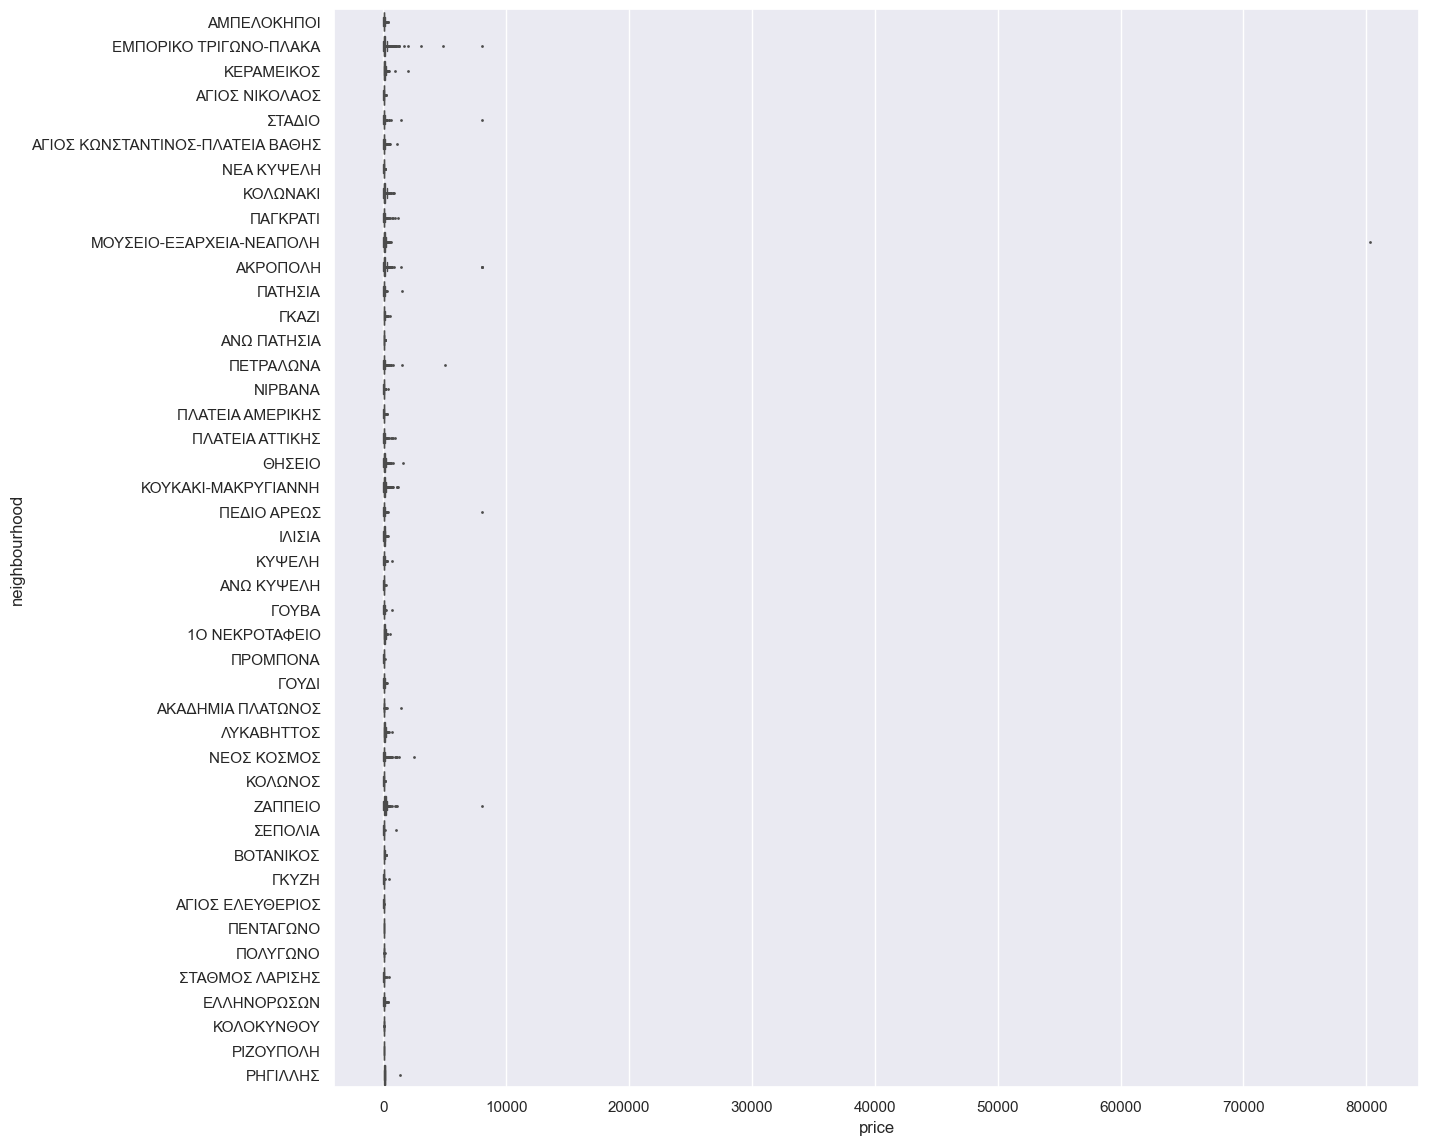

In [171]:
sns.set_style("dark")
sns.set(rc={"figure.figsize": (14, 14)})
sns.color_palette("Set2")

sns.boxplot(x="price", y="neighbourhood", orient="h", data=listings_df, fliersize=1)
plt.show()

This looks quite interesting to say the least. 

* The boxplots are not even visible due to how long the range of values is, with a price being just above `$80.000` (maybe someone put up the Parthenon as a listing).

* Applying an outlier removal algorithm now could potentially be pointless if it is easily affected by extreme values. We have to be careful.

We could use the `IQR` method to remove some outliers from the data, let's create a function for it.

* We prefer it over `zscore` as `IQR` is less sensitive to high standard deviation.

* We will calculate the `IQR` and by taking Q1 and Q3, then subtracting the first from the latter. We then set a threshold of 1.5, which means that we tolerate values within 1.5 times of the inter-quartile range.

* We then filter the dataframes and only keep values that are larger than `Q1 - 1.5*IQR` and lower than `Q3 + 1.5*IQR`

In [172]:
def remove_outliers(group: pd.DataFrame, column_name: str) -> pd.DataFrame:
    Q1 = group[column_name].quantile(0.25)
    Q3 = group[column_name].quantile(0.75)

    IQR = Q3 - Q1

    threshold = 1.5

    group = group[
        (group[column_name] >= Q1 - threshold * IQR)
        & (group[column_name] <= Q3 + threshold * IQR)
    ]
    return group

Now for the removal part:

* We wish to remove the outliers on `neighbourhood` group level.

* A good way to do that is do a `group_by()` and then apply the outlier removal function using `apply()`.

In [173]:
neighbourhood_prices_df = listings_df.copy()

neighbourhood_prices_removed_df = neighbourhood_prices_df.groupby(
    "neighbourhood", as_index=False
).apply(remove_outliers, "price")

* Now that we have our data clean of outliers, let's do draw another boxplot.

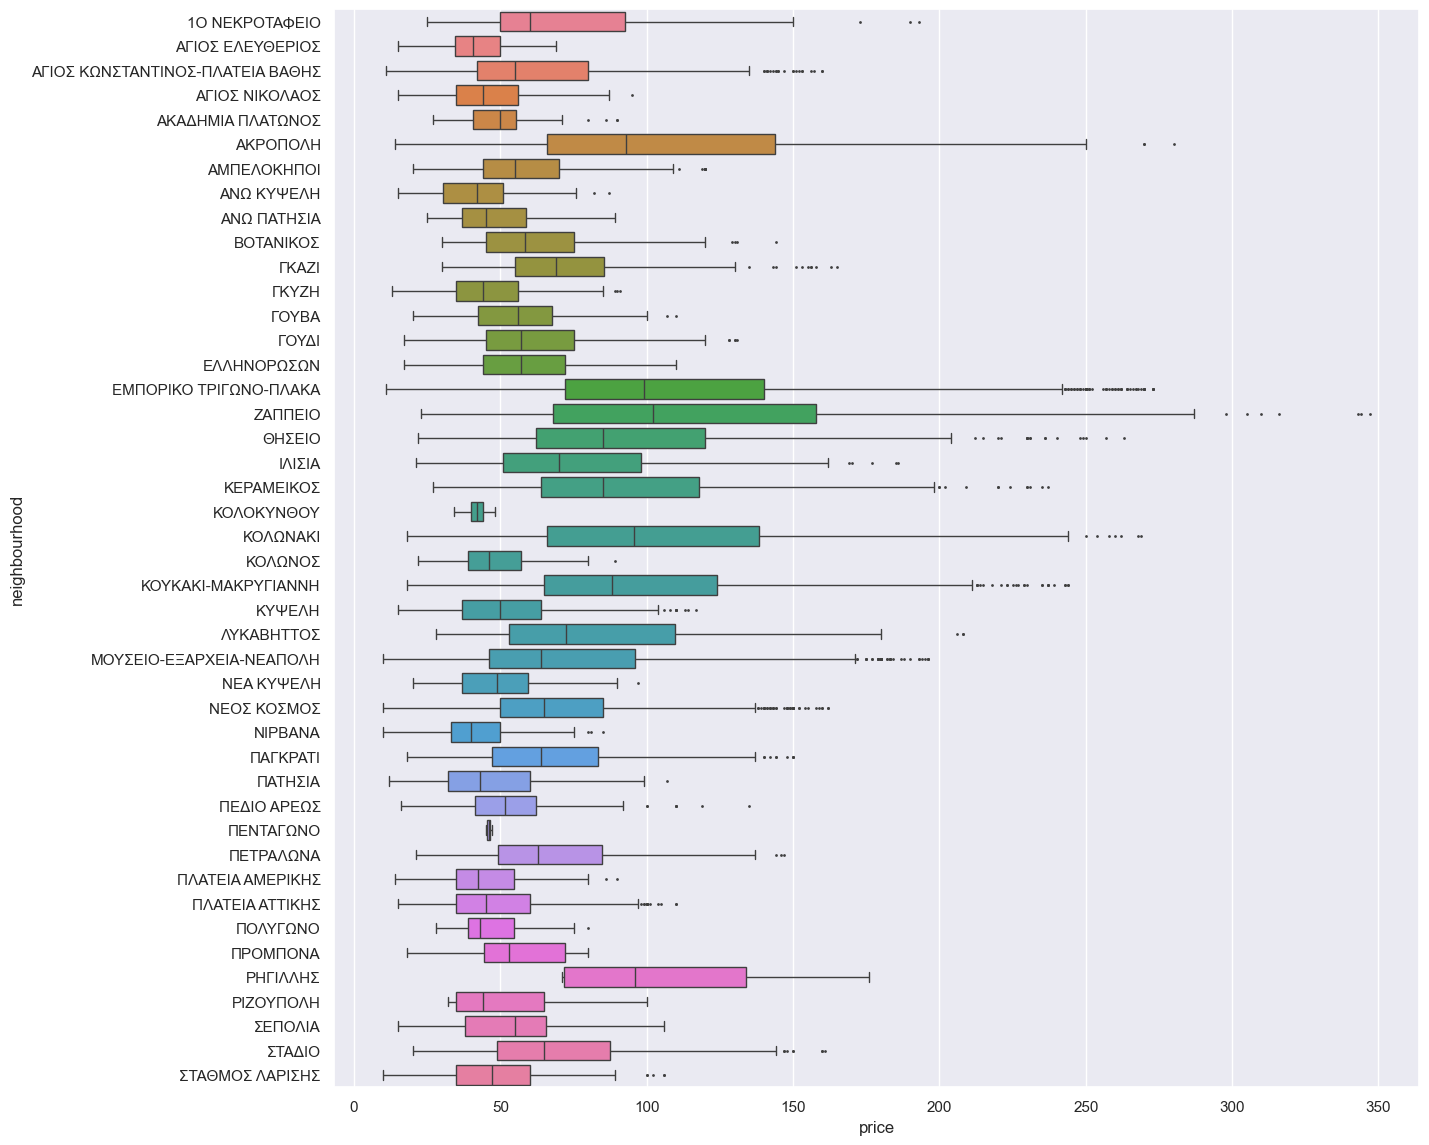

In [174]:
sns.boxplot(
    x="price",
    y="neighbourhood",
    orient="h",
    data=neighbourhood_prices_removed_df,
    hue="neighbourhood",
    fliersize=1,
)
plt.show()

This looks much better, but we still have outliers?

* Not really. The outliers were removed and the `distribution changed`, therefore values that were not previously outliers are now classified as outliers. Removing them all over would be wrong, as we could potentially alienate the data too much.

* We can simply use this boxplot as a reference that our values are now in healthier ranges than before.

* Let's re-generate our table with the price data per `neighbourhood` so we can see the difference.

In [175]:
agg_df = (
    neighbourhood_prices_removed_df.groupby("neighbourhood")["price"]
    .agg(["median", "mean", "std", "count"])
    .round(2)
    .sort_values(by=["median"], ascending=False)
)

agg_df

,median,mean,std,count
neighbourhood,,,,
ΖΑΠΠΕΙΟ,102.0,123.19,74.34,141
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,99.0,111.24,54.08,2244
ΡΗΓΙΛΛΗΣ,96.0,109.75,49.74,4
ΚΟΛΩΝΑΚΙ,95.5,107.26,52.84,396
ΑΚΡΟΠΟΛΗ,93.0,108.84,55.71,358
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,88.0,98.02,45.93,1041
ΚΕΡΑΜΕΙΚΟΣ,85.0,96.10,47.32,309
ΘΗΣΕΙΟ,85.0,99.29,50.40,353
ΛΥΚΑΒΗΤΤΟΣ,72.5,85.02,42.20,150


It is clear that the `standard deviation` has dropped significantly across the neighbourhoods, and thus the mean prices seem much more reasonable.

* A brief look on how the `neighbourhoods` are ranked based on `median` shows that the ranking didn't change much, as the `median` is not sensitive to extreme values like the `mean`, so if we didn't present the other 2 metrics (`std`, `mean`) perhaps this whole process wouldn't be so necessary for ranking on the `median`.

* The dropping `standard deviation` is a good sign that the outliers were adding noise to our data.

Finally, let's see the average amount of listings that was removed per neighbourhood after the outlier removal process, in `absolute` value as it will be negative otherwise. 

In [176]:
res = agg_df - neighbourhood_price_info_df
res.reset_index(inplace=True)

np.abs(res["count"].mean())

21.5

## Availability per Day

Create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.

### Main Problem

For this task, we will make use of the `calendar_df` data we imported.

* We want to keep the dates a listing is available. For this, we simply locate where `calendar_df["available"] == "t"` in our DataFrame.

* In order to get the number of listings available for a specific date, we can call the `group_by()` function on the `date` column, then `count()` the occurences per group. 

* We keep the date as index and go for the columns that interest us, in this case `available` (which holds the count of available listings for that date).

In [177]:
availability_calendar_df = calendar_df.loc[calendar_df["available"] == "t"]
availability_calendar_df = availability_calendar_df.groupby("date").count()[
    ["available"]
]
availability_calendar_df.reset_index()

,date,available
0,2023-09-21,540
1,2023-09-22,982
2,2023-09-23,1475
3,2023-09-24,2495
4,2023-09-25,3194
...,...,...
360,2024-09-15,7532
361,2024-09-16,7535
362,2024-09-17,7532
363,2024-09-18,7537


Seems like we have data starting from `21/09/2023` until `19/09/2024`, with `365 rows`, indicating a full year of data.

Let's create our plot. We will use `plotly.express` as it is a very powerful abstraction that allows us to build beautiful time series plots, with features such as:

* Interactive data points with information. In our case it will show the amount of available listings on a specific day (point).

* Range slider which allows us to slice our plot and zoom into specific date ranges. This is especially useful because it allows us to explore the data in subsets of the available date data without creating multiple plots.

* The colour choice is a carefully picked green for availability.

Additionally, some observations are:
    
* Since we are dealing with `time series` data, a continuous line would seem appropriate, however our date timestamps are taken on a daily basis, not a continuous hourly or by-minute basis. Therefore we can use a `bar` plot, which may appear continuous from afar, but actually shows the data per distinct day timestamp.

* Adding a point on the exact timestamp allows us to check the aforementioned information (`day`, `available listings`) for every single day in our data. This is especially useful as it allows us to tell the days apart on the continuous line.

* The plot was carefully crafted to be as easy on the eye as possible while containing all the necessary information (i.e. minor ticks per thousand available, ticks per month)

In [178]:
x_axis_range = [
    availability_calendar_df.index.min(),
    availability_calendar_df.index.max(),
]
y_axis_range = [0, round(availability_calendar_df["available"].max(), -3)]

fig = px.bar(
    availability_calendar_df,
    x=availability_calendar_df.index,
    y="available",
    title="Number of Available Listings per Day",
    labels={"available": "Available Listings", "date": "Date"},
    color_discrete_sequence=["#4c9a2a"],
)

fig.update_xaxes(
    range=x_axis_range,
    rangeslider_visible=True,
    nticks=12,
    tickangle=35,
    ticklabelmode="period",
    ticklen=10,
    tickcolor="black",
    griddash="dash",
    gridcolor="black",
    mirror=True,
    linecolor="black",
)

fig.update_yaxes(
    range=y_axis_range,
    tickcolor="white",
    tick0=1,
    dtick=1000,
    mirror=True,
    linecolor="black",
    gridcolor="white",
)

fig.update_traces(hovertemplate="Date: %{x}" + "<br>Available Listings: %{y}")


fig.show()

* That's interesting, why aren't there many available listings in Autumn 2023?

### EXTRA: Earth, Wind & Unavailability

With the data made available to us, we can explore whether the amount of `available` bookings exceeded the amount of `unavailable` bookings on a specific date.

Data assumptions from the data provider, [Inside AirBnB](http://insideairbnb.com/data-assumptions/);

* `avalable` variable means whether the date is available for a booking.

* The Airbnb calendar for a listing does not differentiate between a `booked` night vs an `unavailable` night, therefore these bookings have been counted as "`unavailable`". This serves to understate the Availability metric because popular listings will be "booked" rather than being "blacked out" by a host.

Initially we will:
* Take the total amount of listings per day.

* Count the number of available and unavailable listings per day.

In [179]:
total_listings_per_day = calendar_df.groupby("date")["available"].count()
available_listings_per_day = (
    calendar_df[calendar_df["available"] == "t"].groupby("date")["available"].count()
)
unavailable_listings_per_day = (
    calendar_df[calendar_df["available"] == "f"].groupby("date")["available"].count()
)

total_listings_per_day.sample(3)

date
2024-07-01    12954
2024-05-12    12954
2023-10-14    12954
Name: available, dtype: int64

We generally have `12954` listings per day, which makes sense if we recall dataset exploration from earlier.

Now, let's plot our data so we can make observations. The plot of choice will be a `Stacked Bar Chart`.

* Since we will `normalize` our data, we can stack the available and unavailable listings and have an even chart. This way we can observe the % of unavailable listings compared to available ones.

* While the previous plot gave us a decent general image of the amount of `available` listings, it could leave a not-very-curious mind wondering why the amount of available listings is so low early in the time series dates. The answer is clear when looking at the dataset shape and how it was retrieved, but let's assume that one did not try to understand the data and is here for the eye candy plots.

* We will add a low opacity line on the 50% mark as a reference.

In [180]:
availability_df = pd.DataFrame(
    {
        "Date": total_listings_per_day.index,
        "Available": available_listings_per_day / total_listings_per_day * 100,
        "Unavailable": unavailable_listings_per_day / total_listings_per_day * 100,
    }
)

y_axis_range = [0, 100]


fig.update_traces(hovertemplate="Date: %{x}" + "<br>Available Listings: %{y}")


fig = px.bar(
    availability_df,
    x="Date",
    y=["Available", "Unavailable"],
    barmode="stack",
    color_discrete_sequence=["#4c9a2a", "#fa9c1b"],
)

fig.update_xaxes(
    range=x_axis_range,
    rangeslider_visible=True,
    nticks=12,
    tickangle=35,
    ticklabelmode="period",
    ticklen=10,
    tickcolor="black",
    griddash="dash",
    gridcolor="black",
    mirror=True,
    linecolor="black",
)

fig.update_yaxes(range=y_axis_range, nticks=20, ticks="inside")

fig.update_layout(
    title="Listing Availability % per Day",
    xaxis_title="Date",
    yaxis_title="% of Listings",
)

vert_line = availability_df["Date"]
fig.add_shape(
    dict(
        type="line",
        x0=availability_df["Date"].min(),
        y0=50,
        x1=availability_df["Date"].max(),
        y1=50,
        opacity=0.1,
        line=dict(
            color="Black",
            width=1,
            dash="dot",
        ),
    )
)
fig.show()

So why are September and October so low on availability?

So it turns out that it's not that there aren't a lot of `available` listings in September and October, it's that there are a lot of **`unavailable`** listings. 

This was clear when we noticed that most of days have approximately `12954` listings published, so that meant that the *low `availability` was a product of high `unavailability`*. One could easily be misled to think that not enough listings were posted that day.


Anyways, what's the reason behind that? Are September and October that popular in Athens?

* Not really, a good guess is that since the dataset snapshot was taken in the [21st of September](https://www.youtube.com/watch?v=Gs069dndIYk), a significant amount of listings would be `unavailable` for at least the next month, as they are actually booked.

* Additionally, we see that after March '24 we have approximately 35-41% of listings marked as `unavailable`. Taking the dataset provider's notes in mind, this could potentially mean that they aren't booked (as the time range is pretty big), but that the owners simply don't allow for bookings that far ahead and have marked them as `unvailable nights`.

## Reviews, Occupacy per Listing, Average Income

Create a histogram showing the number of reviews per listing. The histogram should bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.

Once you have done that, calculate the average occupacy per listing per month. To calculate that, find the average reviews per month and assume that half of the bookings result in reviews.

Then, assuming that each booking is for a three nights stay, calculate the average income per month, using the average price charged throughout all listings.

### Number of Reviews per Listing

For this problem, we will make use of our `listings_df` dataframe. Let's start;

* In order to get the number of reviews per listing, we can make use of the `number_of_reviews` column.

In [181]:
reviews_per_listing_df = listings_df[["id", "number_of_reviews"]]
reviews_per_listing_df.head(4)

,id,number_of_reviews
0,10595,42
1,10990,66
2,10993,92
3,10995,30


Let's now prepare the data for our histogram.

* For the bins, we will need to find the minimum amount of reviews and the maximum amount of reviews, and round them up to the closest hundred. We can do this by taking the `min()` and `max()` from the `reviews_per_listing_df` then rounding to -2, which will round to hundreds.


* We will use `seaborn` for the plot in combination with `matplotlib` for formatting the plot. We will turn the plotting code into a function as we will re-use it, with the ability to add a `kde` and turn the plot into a `logplot`.

In [182]:
sns.set(style="whitegrid")

def review_histplot(
    data: pd.DataFrame, kde: bool = False, step=100, log: bool = False
) -> None:
    min_bin_value = round(data.min(), -3)
    max_bin_value = round(data.max(), -3)

    _, ax = plt.subplots(figsize=(10, 6))

    sns.histplot(
        data,
        bins=np.arange(min_bin_value, max_bin_value, step),
        color="purple",
        edgecolor="black",
        kde=kde,
        line_kws={"color": "crimson", "lw": 1, "ls": "-"},
        log=log,
    )

    ticks = np.arange(min_bin_value, max_bin_value, step)
    ax.set_xticks(ticks)

    ax.set_xticklabels(ticks)

    ax.grid(True)
    plt.grid(color="gray", linestyle="--", linewidth=0.5)

    if not log:
        plt.ylim(0, len(data))

    plt.title("Distribution of Number of Reviews per Listing", fontsize=16)
        
    plt.xlabel("Number of Reviews", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)

    plt.show()

Let's create our initial `histplot` for our data, with a `kde` so we can see the curve of the distribution.

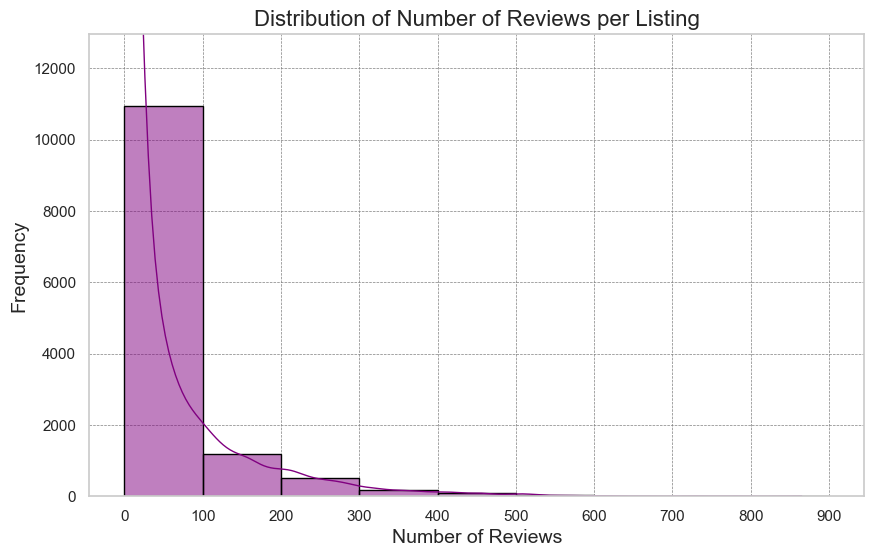

In [183]:
review_histplot(reviews_per_listing_df["number_of_reviews"], kde=True)

* We can see that very few listings have a high number of reviews, while most listings have `0-100 reviews`. 

* This makes total sense considering a lot of the listings probably have `0` reviews, and most listings sould fall within the `0-10` range.

In [184]:
count_0_revs = reviews_per_listing_df[
    reviews_per_listing_df["number_of_reviews"] == 0
].count(numeric_only=True)
count_under_10_revs = reviews_per_listing_df[
    (reviews_per_listing_df["number_of_reviews"] >= 0)
    & (reviews_per_listing_df["number_of_reviews"] <= 10)
].count(numeric_only=True)

print(f"Listings with 0 reviews: {count_0_revs}")
print(f"Listings with 0-10 reviews (inclusive): {count_under_10_revs}")

Listings with 0 reviews: number_of_reviews    1956
dtype: int64
Listings with 0-10 reviews (inclusive): number_of_reviews    6001
dtype: int64


* Almost half of the listings have 10 reviews or less, so our original assumption stands.

Now let's make the plot slightly more inclusive.

* The `Frequency` label takes values up to approximately `11.000`, therefore bins with a low amount of reviews are shadowed. 

* Let's turn this into a `logplot` so we can have a better look at the distribution.

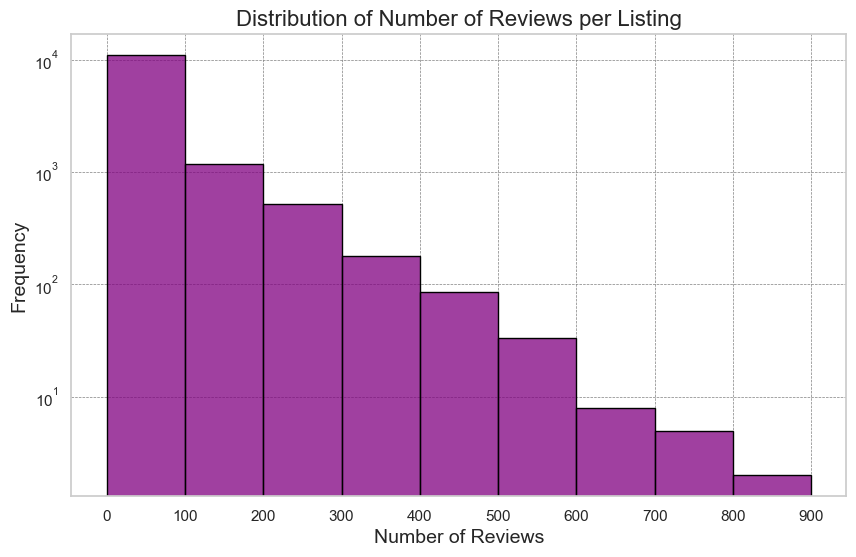

In [185]:
review_histplot(reviews_per_listing_df["number_of_reviews"], log=True)

We can see that it looks like a staircase, so the number of reviews a amount of listings has gradually decreases.

* It is a reasonable conclusion as the amount of listings that have a large amount of reviews is usually small, and they are marked as rare gems in the AirBnB website.

### Average Occupacy per Listing per Month

For this task, we have 2 alternatives to explore:
 
* The `reviews_per_month` column in `listings_df`, which contains the amount of reviews a listing has per month.

* The `reviews_df` dataset, which contains information per-review.

Which one should we proceed with? Let's see.

#### Listings Dataset

For the `reviews_per_month` approach, we can:

* Group by the listings by `id` and take the `mean` value of the `review_per_month` column per listing, then multiply it by 2 to get the `avg_occupancy_per_month`.

In [186]:
reviews_per_month_per_listing_listings_df = (
    listings_df.groupby("id").agg(avg_occupancy_per_month=("reviews_per_month", "mean"))
    * 2
)
avg_occupancy_per_month_listings_df = (
    reviews_per_month_per_listing_listings_df.dropna().sort_values(
        by="avg_occupancy_per_month", ascending=False
    )
)

avg_occupancy_per_month_listings_df.shape

(10999, 1)

* We have `10.999` results, lets now inspect the top 5 listings with the highest avg occupancy per month.

In [187]:
avg_occupancy_per_month_listings_df.head(5)

,avg_occupancy_per_month
id,
54251276,31.00
914571599230791078,26.60
43778929,22.44
881606431285667955,22.28
952653984892688974,22.00


We can also take the mean `avg_occupancy_per_month` across the listings, to compare with the second approach.

In [188]:
avg_occupancy_per_month_listings_df.mean(numeric_only=True)

avg_occupancy_per_month    3.591543
dtype: float64

So we have a mean `avg_occupancy_per_month` of `3.59` bookings when using the `listings_df` data. 

#### Reviews Dataset

For the `reviews_df` approach we have a dataframe which contains plenty of information about reviews, such as their timestamp.

* As we recall from earlier, `reviews_df` contains reviews all the way from `2011`.

* In our case, we need to calculate the `average amount of reviews per month`. What we can do is keep review data for 1 year or 365 days.

* Our dataset samples end in the `21th of September 2023`, therefore what we can do is filter the original dataframe and keep data predating the sample end date by `365 days at most.`

* Since we are dealing with timestamps, we can do this smartly with Pandas' built-in `to_timedelta`.

In [189]:
reviews_365_df = reviews_df[
    reviews_df.date > reviews_df.date.max() - pd.to_timedelta("365day")
][["listing_id", "id"]]

reviews_per_month_per_listing_calendar_df = (
    reviews_365_df.groupby("listing_id").agg(avg_occupancy_per_month=("id", "count"))
    / 12
)

avg_occupancy_per_month_reviews_df = round(
    reviews_per_month_per_listing_calendar_df * 2, 2
).sort_values(by="avg_occupancy_per_month", ascending=False)

avg_occupancy_per_month_reviews_df.shape

(9574, 1)

In [190]:
(
    avg_occupancy_per_month_listings_df.shape[0]
    - avg_occupancy_per_month_reviews_df.shape[0]
)

1425

* We can already see that we have less rows than before. In fact, `1425` less. 

* Why could that be? Let's take a better look.

In [191]:
avg_occupancy_per_month_reviews_df.head(5)

,avg_occupancy_per_month
listing_id,
54251276,34.17
34645780,23.83
39815178,23.00
33990666,21.83
43778929,21.67


In [192]:
avg_occupancy_per_month_reviews_df.mean(numeric_only=True)

avg_occupancy_per_month    3.086778
dtype: float64

So we have a mean `avg_occupancy_per_month` of `3.08` bookings when using the `reviews_df` data. 

OK, so the data is different;

* The top listings and the mean has changed. If the shape wasn't enough to convince us (it should have been), then we can see qunatitatively that these two datasets produce different results. 

#### The culrpit

We might have rushed in a little too fast when doing our analysis.

* If we recall from the imports, `listings_df` has a `datetime` column named `last_review`. Let's take a look at the listing that wast last reviewed the longest ago.

In [193]:
listings_df["last_review"].min()

Timestamp('2013-05-23 00:00:00')

Everything makes sense now.

* In the `reviews_df` data, we only extracted results from the last `365` days of our dataset.

* The `listings_df` data contains listings with reviews as old as `2013`, something we filtered out when we ran the second analysis.

So which analysis is correct?

* The `reviews_df` data and the filtering we did on them give us reviews based on the `last fiscal year` from the last sample. This has reduced our available data, but provides us a much more accurate and recent image of what's going on with AirBnB.

* The `listings_df` data does not seem the right fit for analysis in this case, because we ended up extracting results based on `10 years of data`, something that will might pose threat when we analyze the `average income` and make more assumptions. Let's not forget about inflation!

### Average Income

Now, let's calculate the average income. 

* We can make use of the `avg_occupancy_per_month_reviews_df` data, as it contains the average amount of bookings per month per listing.

* We can also use the `neighbourhood_prices_removed_df` data, as it is clean of outliers. We will have to filter it a bit, however, to match our available occupancy per listing.

Let's start!

In [194]:
neighbourhood_prices_removed_df.last_review.min()

Timestamp('2014-06-26 00:00:00')

* Just like `listings_df`, `neighbourhood_prices_removed_df` has old data. This goes without saying considering the latter is a subset. 

* We will have to clean it out to keep only the listings we have in `avg_occupancy_per_month_reviews_df`, which is already filtered by date.

* We can do this by joining the two dataframes on their common attribute, `id` and `listing_id` respectively. 

* We will use a `inner` join, as we want to get rid of possible null values.

In [195]:
merged_df = pd.merge(
    avg_occupancy_per_month_reviews_df,
    neighbourhood_prices_removed_df,
    left_on="listing_id",
    right_on="id",
    how="inner",
)

avg_occupancy_per_month_reviews_df.shape[0] - merged_df.shape[0]

574

* We can see that that we have `574` less values in our merged dataframe than in the original data.

* This is because possibly we could not get pricing data on these listings from the `neighbourhood_prices_removed_df` data.

Let's take a look at our new data now.

In [196]:
merged_df[["id", "avg_occupancy_per_month", "price"]].sample(4)

,id,avg_occupancy_per_month,price
7004,891317793150867741,0.5,55
1758,38519936,5.5,59
4741,788238569829843753,1.5,60
3198,26237466,3.0,81


* We may now take the mean of the available prices, as we know they are recent, relevant and clean of outliers.

In [197]:
avg_price_365_df = merged_df["price"].mean()
avg_price_365_df

78.42

So, all the listings that have been active for the `past 365 days` since the last available data point, clean of outliers, have a mean price of `$78.42`.

* Let's calculate our average income per month now, with the assumption that each booking (occupancy) is for` 3 nights`.

In [198]:
avg_income_per_month = np.mean(
    merged_df["avg_occupancy_per_month"] * 3 * avg_price_365_df
)
round(avg_income_per_month, 2)

730.87

So the average income *per listing per month* is `$730.87`, according to our analysis. How accurate is that?

* Our original dataset had `12955` values, and we are left with `9000`.

* We deal data who have undergone outlier detection and removal.

* Assumptions have been made throughout this analysis, perhaps one too many. (i.e. occupancy derived from reviews, how many nights are booked).

However, this is a good approximation that gives us a general idea of how much money a AirBnB owner makes on a monthly basis per listing, and the amount seems reasonable for a city like Athens.

## Listings per Room Type

Show the number of listings per room type, in absolute numbers, and also in percentages (the percentage of listings for each particular room type). Then, show the number of listings per neighrbourhood and room type.

For this task we will use our `listings_df` table. Let's show the number of listings per room type.

* For `absolute numbers`, we can simply use `value_counts()` as is.

* For `percentages`, we can use `value_counts(normalize=True)`, where the `normalize` keyword argument will convert everything to percentages relative to the set.

In [199]:
listings_df["room_type"].value_counts().reset_index()

,room_type,count
0,Entire home/apt,11652
1,Private room,1113
2,Hotel room,105
3,Shared room,85


In [200]:
listings_df["room_type"].value_counts(normalize=True).round(2).reset_index()

,room_type,proportion
0,Entire home/apt,0.90
1,Private room,0.09
2,Hotel room,0.01
3,Shared room,0.01


* We can see that most of the `room_type`'s are entire homes/apartments, at `90%` of the listings being just that.

* Athens hotels are unpopular on AirBnB (maybe they prefer Booking?), just like shared rooms.

* Initially this could be odd considering that in a lot of European countries AirBnB listings are for shared apartments/rooms, but one look at the price table could alleviate any concerns. Athens is cheaper than other European capitals, and listing owners can list entire apartments/homes at affordable prices for visitors.

Finally, to show the number of listings per neighbourhood per room type, we can:

1) Group by `neighbourhood`, `room_type` and `count()` the occurences.
2) Take the `id` column which contains the count.
3) Unstack the dataframe and `fill_value` with 0, as it will give us insights on what listings do not exist per neighbourhood.
4) Sort by neighbourhood alphabetically, for practical reasons when studying the results.



In [201]:
listings_df.groupby(["neighbourhood", "room_type"]).count()["id"].unstack(
    fill_value=0
).sort_values(by="neighbourhood")

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,55,0,0,0
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,33,0,5,0
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,686,4,117,10
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,91,0,8,0
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,74,0,2,0
ΑΚΡΟΠΟΛΗ,360,6,20,0
ΑΜΠΕΛΟΚΗΠΟΙ,431,0,17,4
ΑΝΩ ΚΥΨΕΛΗ,103,0,16,0
ΑΝΩ ΠΑΤΗΣΙΑ,61,0,3,0


As expected from earlier analysis, every single neighbourhood has `entire apartment/home`'s available, but we see a lot of 0's in other `room_type`'s.

## Prices per Day

Create a table with the average price per listing per day. Draw a graph visualizing the table.

For this task, we can make use of the `calendar_df` dataset.

* The data we have are timestamps from the beggining of the snapshot and 365 days onwards.

* We have our `price` column, which may be used for this graph.

* We also have an `adjusted_price` column, which we have no information on as the glossary does not explain its purpose. We will simply calculate for this column as well.

In [202]:
calendar_df.sample(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
2490447,52322348,2023-10-24,f,40,40,6,1125
2147850,46464310,2024-03-10,t,49,49,1,1125
2960141,635861346421055433,2024-08-23,t,45,41,1,365
3150159,672317550995326274,2024-03-29,t,200,200,2,1125
4370345,922408856030615112,2024-03-20,t,65,65,3,1125


#### Outlier Removal

But first, lets check for outliers.

* We have `365` dates, so a boxplot would be a bit difficult here. 

* We could potentially group by month so we can get a more general image, but we have approximately `4.700.000` data points, and this will lead into the notebook freezing (it was attempted).

* We can do a quick check if the crazy high prices from before are in this dataset aswell, and then go by instinct and apply the `IQR` algorithm once more.

In [203]:
calendar_max_price = calendar_df["price"].max()
calendar_max_adjusted_price = calendar_df["adjusted_price"].max()

print(
    f"Max Price: {calendar_max_price}\nMax Adjusted Price: {calendar_max_adjusted_price}"
)

Max Price: 85140
Max Adjusted Price: 85140


Yep, the crazy values are still here. Let's clean them out.

* We will use our `remove_outliers` function from before, for the `price` and `adjusted_price` columns.

* We will remove the outliers on a `date` basis, so on a group basis. This is recommended in this case as what is an outlier for a specific date, could be absolutely normal for another day.

* We also treat the two prices as independent, although they are not. This is why we remove outliers on both of them seperately despite it not being ideal. We do not have any information on what `adjusted_price` really means, and we only include it for completeness.

In [204]:
price_per_day_df = calendar_df.copy()

price_per_day_clean_df = price_per_day_df.groupby("date", as_index=False).apply(
    remove_outliers, "price"
)
adjusted_price_per_day_clean_df = price_per_day_df.groupby(
    "date", as_index=False
).apply(remove_outliers, "adjusted_price")

price_diff = calendar_df.shape[0] - price_per_day_clean_df.shape[0]
adjusted_price_diff = calendar_df.shape[0] - adjusted_price_per_day_clean_df.shape[0]

print(
    f"Price Outliers Removed: {price_diff}\nAdjusted Price Outliers Removed: {adjusted_price_diff}"
)

Price Outliers Removed: 360085
Adjusted Price Outliers Removed: 363006


* The amount of outliers is similar but not the same.

* We have approximately `360.000` outliers in a dataset with `4.700.000` values. That's around `7.5%` of values removed, which is a lot of outliers which are usually around `3%` for normally distributed datasets.

* Let's take a look out our clean data.

#### Main Task

We can now create our joint table, where for each `date` we will hold the `mean` `price` and `adjusted_price`.

* We want to find the average price per day, so we can group by `date` as the timestamps are per-day.

* We can aggregate the `price` and `average_price` columns and get the `mean` per date.

In [205]:
avg_price_per_day_df = pd.DataFrame()

avg_price_per_day_df["avg_price"] = price_per_day_clean_df.groupby("date").agg(
    avg_price=("price", "mean")
)
avg_price_per_day_df["avg_adjusted_price"] = adjusted_price_per_day_clean_df.groupby(
    "date"
).agg(avg_adjusted_price=("adjusted_price", "mean"))

avg_price_per_day_df.shape

(365, 2)

* We have our table with 365 features (dates) and 2 variables (the prices). Let's examine a `sample` of it. 

In [206]:
avg_price_per_day_df.sample(5)

,avg_price,avg_adjusted_price
date,,
2024-02-17,77.301070,75.104972
2024-03-14,77.690203,77.190745
2023-11-07,72.102671,71.768800
2023-11-26,71.957726,71.573790
2024-09-01,82.729818,82.288287


* Naturally, `avg_adjusted_price` is slightly lower or equal to the `avg_price`, as the adjustment almost always led to a reduction.

Let's plot our findings.

* We can reuse code from the `Availability per Day` task with slight adjustments.

* We will now have 2 lines on our plot, one for each price type. 

* I have carefully picked `scikit-learn`'s blue and orange, as they are my favorite plotting colours, and they look nice.

In [207]:
x_axis_range = [avg_price_per_day_df.index.min(), avg_price_per_day_df.index.max()]
y_axis_range = [
    round(avg_price_per_day_df["avg_price"].min()) - 5,
    round(avg_price_per_day_df["avg_price"].max(), -1),
]

fig = px.line(
    avg_price_per_day_df,
    x=avg_price_per_day_df.index,
    y=["avg_price", "avg_adjusted_price"],
    title="Average Price per Day",
    labels={"value": "Average Price ($USD)", "date": "Date"},
    color_discrete_sequence=["#00a7e1", "#ffa630"],
)

fig.update_xaxes(
    range=x_axis_range,
    rangeslider_visible=True,
    nticks=12,
    tickangle=35,
    ticklabelmode="period",
    ticklen=10,
    tickcolor="black",
    griddash="dash",
    gridcolor="black",
    mirror=True,
    linecolor="black",
)

fig.update_yaxes(
    range=y_axis_range,
    tickcolor="white",
    tick0=min(y_axis_range),
    dtick=max(y_axis_range) % 10,
    mirror=True,
    linecolor="black",
    gridcolor="white",
)

fig.update_traces(hovertemplate="Date: %{x}" + "<br>Average Price: %{y}")


fig.show()

#### Conclusions

* A downward drop can be seen as we enter the colder Autumn and Winter months, which is totally reasonable if we take into consideration that `Greece`, and subsequently `Athens` are a popular Summer destination for most visitors.

* A significant increase of around `$10` can be seen during the Christmas period all the way to New Years.

* As the line approaches the warm summer months, we can see a gradual increase of the average prices, with them peaking out in June 8th.

* The `avg_adjusted_price` follows the same trend of `avg_price`, as expected from earlier.

* Everything seems pretty logical if we take into consideration AirBnB's [SmartPricing](https://www.airbnb.com/help/article/1168), which automatically adjusts the price of a listing based on demand and seasonal shifts.

## Listings per Host

Create a table with the number of listings per host, in descending order. Create a graph that will show the distribution of listings per host, as follows:

* You will rank the host on a number of listings basis. So, the first host will be the one with the largest number of listings, the second host will be the one with the second largest number of listings, etc. If there is a number of hosts with the same listings, just add them in sequence. For instance, if there are 10 hosts with one listing each, add them in the ranking with any order between them.

* On the $y$ axis you will have the number of listings.

That is, a point $(x, y)$ will mean that the $x$-th highest hosting host has $y$ listings.

After you have drawn the plot, do another one, this time with the $x$ axis in *logarithmic* scale.

For this task, we will be using the `listings_df` dataset as it contains:

* `host_id` value per listing.

* `calculated_host_listings_count` value per host_id.

* We can keep the aforementioned relevant columns, `drop_duplicates()` for each `host_id` and sort by `calculated_host_listings_count`.

In [208]:
host_listings_df = (
    listings_df[["host_id", "calculated_host_listings_count"]]
    .drop_duplicates("host_id")
    .sort_values("calculated_host_listings_count", ascending=False)
    .reset_index()
)
host_listings_df.index = host_listings_df.index + 1
host_listings_df.index.name = "rank"


host_listings_df[["host_id", "calculated_host_listings_count"]]

,host_id,calculated_host_listings_count
rank,,
1,20104194,114
2,113548208,88
3,90390850,78
4,748818,74
5,47267002,61
...,...,...
5770,271377857,1
5771,241385044,1
5772,42496318,1


Now that we have our table, we can start plotting.

* We can instatiate a `function` that, depending on the argument, plots the aforementioned table in a `linear` or `logarithmic` (or any other possible) way.

* Since we want the x-th point to be the x-th ranked host, we can put the `rank` in the x-axis.

In [209]:
def plot_listings_distribution(data: pd.DataFrame, xaxis_type: str = "linear") -> None:
    fig = px.scatter(
        data,
        x=data.index,
        y="calculated_host_listings_count",
        title="Listings per Host Rank",
        labels={
            "rank": "Host Rank",
            "calculated_host_listings_count": "Num. of Listings",
        },
        color_discrete_sequence=["#00a7e1"],
    )

    fig.update_xaxes(
        ticklabelmode="period",
        ticklen=10,
        tickcolor="black",
        griddash="dash",
        gridcolor="black",
        mirror=True,
        linecolor="black",
        type=xaxis_type,
    )

    fig.update_yaxes(
        tickcolor="white",
        mirror=True,
        linecolor="black",
        gridcolor="white",
    )

    fig.update_traces(hovertemplate="Rank: %{x}" + "<br>Listings: %{y}")

    fig.show()

Our function is ready. Let's plot our table in a `linear` way.

In [210]:
plot_listings_distribution(host_listings_df)

That is a `curvy` plot. 

* Majority of the hosts have `1 listing`, thus the curve results to a straight line in the end.

* This plot shows us that very few hosts have a large amount of listings (few data points in high ranks), and that the difference even among the top 5 is pretty big.

In [211]:
host_listings_df.head(5)

,index,host_id,calculated_host_listings_count
rank,,,
1,503,20104194,114
2,1070,113548208,88
3,856,90390850,78
4,136,748818,74
5,470,47267002,61


* The `5th` ranked host has almost half the `listings` of the `1st` one.

* This plot is unecessarily long as a large amount of data points are of the same y-value, which results in a long plot that for its major part, is a straight line. 

* Let's give the `logplot` a try.

In [212]:
plot_listings_distribution(host_listings_df, "log")

* The `logplot` magnifies the difference in `listings` among the top ranks, while minimizing the effect of the low-ranked low-listing data points have on the shape of the plot.

* It becomes apparent that a miniscule amount of the hosts has a large amount of listings, while most hosts have 1 or 2 listings at best. This tells us a lot about the world that we live in, where the 0.01% has majority of the wealth. Or not, anyway...

## Visualize Listings

Draw an interactive map to show the listings overlayed on Athens.

You can use the [folium](https://github.com/python-visualization/folium) library to create your map; spend some time reading the documentation.

The map should show each listing and on clicking on top of it, the user should see a short description of the listing.

Note that such a map is heavy on resources. You will probably *not* be able to include it in a Jupyter notebook, so you should save it to an external HTML file that can be opened by any browser. Also, to make things easier, you may wish to limit the maximum zoom level from 12 to 15 (after you read folium's documentation you will know what this is).

Hint: be careful with the description data, if they contain some characters they may not be rendered in HTML and may destroy your output.

#### Imports & Data

* For this task, we will be using our `listings.csv.gz` dataset. While throughout the `listings.csv` summary has been enough for our analysis, we wish to print more information now that we are doing a visual representation of our dataset. It also contains the `description` column, unlike the summary, which is required.

* Some of the data, like prices, are in string format as they contain characters like the `$` symbol.

* We will not do any outlier detection and filtering for this visualization.

In [213]:
listings_complete_df = pd.read_csv(
    "airbnb/listings.csv.gz", delimiter=",", index_col=False
)

listings_complete_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

Since we will be printing information on a map, we might have `NaN` values. Let's replace them with a more-informative and generic `N/A` message.

In [214]:
listings_complete_df.fillna("N/A", inplace=True)

Now, let's create the AirBnB map of Athens.

* We will use `folium` and its subcomponents such as:
    * `IFrame` for displaying our info per data point.
    * `MarkerCluster` for clustering our data points into "neighbourhoods" when zoomed out, as it is a non-informative eyesore if all the data points are visible from afar.
    

* Athens' coordinates for map centering were taken from [this](https://www.latlong.net/place/athens-greece-22451.html#:~:text=Athens%2C%20Greece%20Lat%20Long%20Coordinates,%C2%B0%2043'%2039.1404''%20E.) website.

* We will use a `min_zoom` of 12 and a `max_zoom` of 18, as clustering will be visible from afar and we wish to be explore the available listings in-depth per neighbourhood. Clusters are broken into data points at zoom level 16.

* `neighbourhoods.geojson` could be used, as folium supports GeoJson format mapping. This would map each neighbourhood according to AirBnB, however in this case it adds more visual clutter to the map. One idea for future reference would be doing clustering on a per-neighbourhood level, then expanding when zoomed in.

* `IFrame` popup limits, as well as font limits, have been adjusted for the least overwhelming but most informing experience.

* Descriptions are sliced to avoid long popups. There is also a limit of 70 words.

* Listing titles are tied by link to their original `AirBnB website` listings.

* We use `html` to visualize the `IFrame` data, which is then injected into the frame.

In [215]:
from folium import IFrame
from folium.plugins import MarkerCluster

# Constants
ATHENS_COORDINATES = {"lat": 37.983810, "lon": 23.727539}

IFRAME_MAX_W = 400
IFRAME_W = 350
IFRAME_H = 150

WORD_LIMIT = 400

MARKER_RAD = 3
MARKER_OPC = 0.6
MARKER_FIL = True
MARKER_CLR = "cadetblue"


# Map Initialization
athens_map = folium.Map(
    location=[ATHENS_COORDINATES["lat"], ATHENS_COORDINATES["lon"]],
    zoom_start=14,
    min_zoom=12,
    max_zoom=18,
    control_scale=True,
)

marker_cluster = MarkerCluster(disableClusteringAtZoom=16).add_to(athens_map)

# Slicer Function


def slice_description(desc):
    words = desc.split()
    if len(words) <= WORD_LIMIT:
        return desc
    else:
        return " ".join(words[:WORD_LIMIT]) + "..."


# Map Filling
for _, listing in listings_complete_df.iterrows():
    latitute = listing["latitude"]
    longitude = listing["longitude"]

    listing_name = str(listing["name"])
    description = slice_description(str(listing["description"]))
    price = str(listing["price"])
    url = str(listing["listing_url"])
    review_score = str(listing["review_scores_rating"])
    num_reviews = str(listing["number_of_reviews"])

    iframe_msg = f"""
        <h4 style="font-size: 14px;"><a href="{url}" target="_blank">{listing_name}</a></h4>
        <b style="font-size: 14px;"><br>Review score: {review_score}<br>Number of reviews: {num_reviews}<br></b>
        <b style="font-size: 14px;">Price: {price} per night</b>
        <p style="font-size: 13px;">---------------<br>{description}<br>---------------</p>
        """

    iframe = IFrame(iframe_msg, width=IFRAME_W, height=IFRAME_H)
    popup = folium.Popup(iframe, max_width=IFRAME_MAX_W)

    folium.CircleMarker(
        location=[latitute, longitude],
        popup=popup,
        radius=MARKER_RAD,
        color=MARKER_CLR,
        fill=MARKER_FIL,
        fill_opacity=MARKER_OPC,
    ).add_to(marker_cluster)

athens_map.save("./athens_airbnb_map.html")

## Submission Instructions

You must submit your assignment as a Jupyter notebook that will contain the full code and documentation of how you solved the questions, plus the HTML file containing the visualization of the last question. The Jupyter notebook must be fully replicable: that is, somebody reading it must be able to do exactly what you did and obtain the same results.

The documentation must be at the level where somebody that has some Pandas and Python knowledge can understand exactly what you are doing and why. Your output must be as user-friendly as possible. That means that your output tables should not include zillions of columns that are not needed for your analysis.

## Honor Code

You understand that this is an individual assignment, and as such you must carry it out alone. You may seek help on the Internet, by Googling or searching in StackOverflow for general questions pertaining to the use of Python and pandas libraries and idioms. However, it is not right to ask direct questions that relate to the assignment and where people will actually solve your problem by answering them. You may discuss with your colleagues in order to better understand the questions, if they are not clear enough, but you should not ask them to share their answers with you, or to help you by giving specific advice.